In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
# 生成分类数据集
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义不同的学习率
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

# 训练模型并计算精度
train_accs = []
test_accs = []

In [3]:
for rate in learning_rates:
    # 定义模型并训练
    model = GradientBoostingClassifier(learning_rate=rate)
    model.fit(X_train, y_train)
    
    # 计算训练集和测试集的精度
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    # 保存训练集和测试集的精度
    train_accs.append(train_acc)
    test_accs.append(test_acc)

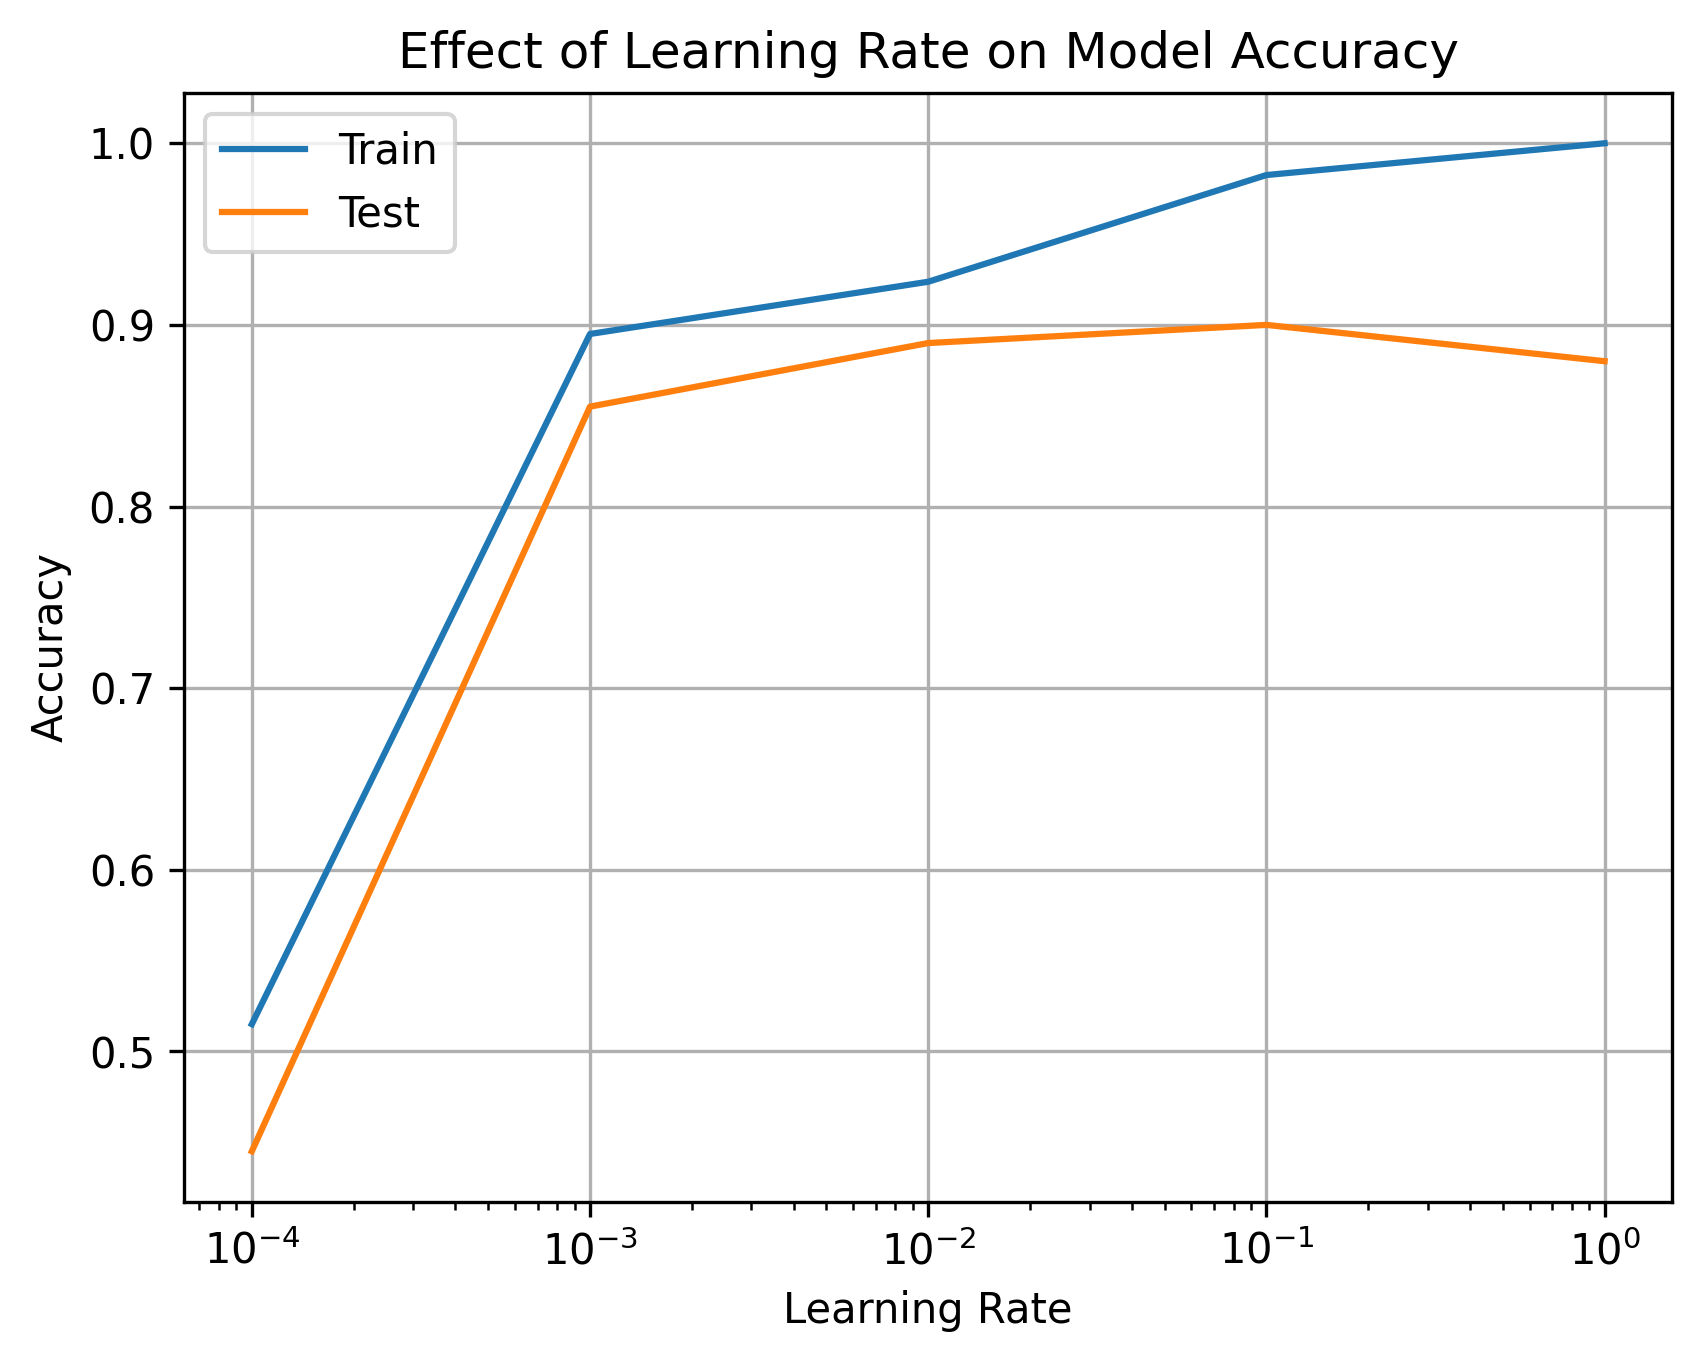

In [4]:
# 可视化学习率对模型精度的影响
plt.figure(dpi=300)
plt.plot(learning_rates, train_accs, label='Train')
plt.plot(learning_rates, test_accs, label='Test')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Effect of Learning Rate on Model Accuracy')
plt.legend()
plt.grid()
plt.show()

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform

# 定义超参数搜索空间
param_dist = {'learning_rate': uniform(0, 1)}

# 定义模型
model = GradientBoostingClassifier()

# 定义随机搜索
rs = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10)

# 进行随机搜索训练
rs.fit(X_train, y_train)

# 输出最优参数
print(rs.best_params_)


{'learning_rate': 0.19713751170480986}


In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X, y = housing.data, housing.target

In [7]:
# 从sklearn的tree模块中导入DecisionTreeRegressor类，这是用于回归任务的决策树模型。
from sklearn.tree import DecisionTreeRegressor

# 从sklearn的model_selection模块中导入GridSearchCV类，它是一个用于执行网格搜索的工具，
# 可以帮助我们找到最佳的模型超参数组合。
from sklearn.model_selection import GridSearchCV

# 定义一个决策树回归模型实例，设置随机种子为0以确保结果可复现。
tree = DecisionTreeRegressor(random_state=0)

# 定义一个字典，其中包含我们想要探索的不同超参数的候选值。
# 这些超参数包括：
# max_depth - 决策树的最大深度
# min_samples_split - 当前节点上需要的最小样本数，以便继续进行分支
# min_samples_leaf - 叶子节点上所需要的最小样本数
# max_features - 最大特征数量来考虑在寻找最佳拆分
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],     # 决策树的最大深度候选值
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],  # 分裂所需最小样本数
    'min_samples_leaf': [1, 2, 3, 4, 5],  # 叶子节点上的最小样本数
    'max_features': [None, 'sqrt', 'log2']  # 考虑的最佳特征数量
}

# 创建一个GridSearchCV实例，传入之前定义的决策树模型和超参数网格。
# 设置cv参数为5，意味着我们将使用5折交叉验证来进行模型评估。
grid_search = GridSearchCV(tree, param_grid, cv=5)

# 使用数据X（特征矩阵）和y（目标向量）来拟合GridSearchCV实例。
# 这将会自动执行网格搜索，并使用交叉验证来评估每个超参数组合。
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [8]:
print(grid_search.best_params_)

{'max_depth': 4, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


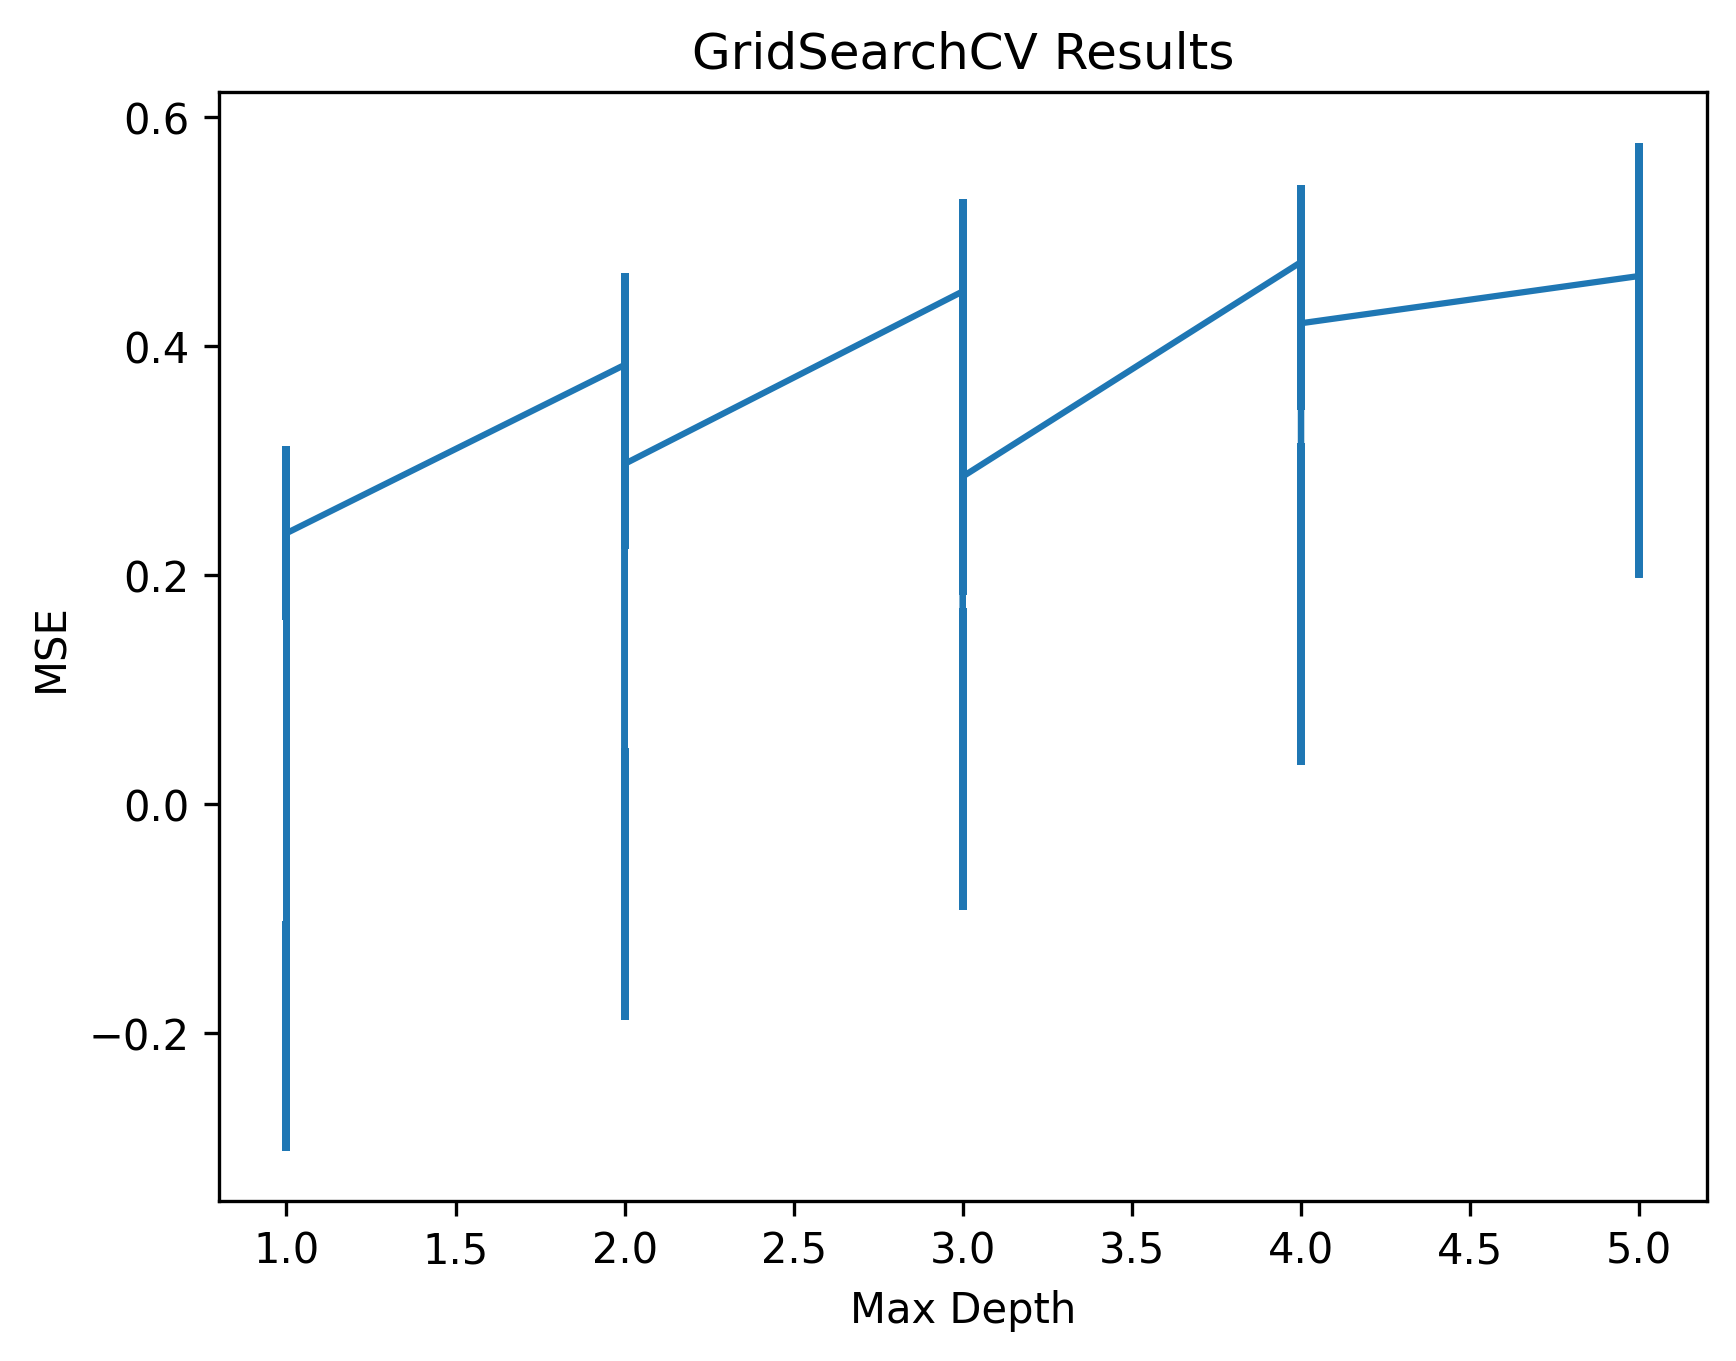

In [10]:
# 提取网格搜索结果中每个配置的最大深度
max_depths = [params['max_depth'] for params in grid_search.cv_results_['params']]

# 提取每个配置对应的平均测试得分
means = grid_search.cv_results_['mean_test_score']

# 提取每个配置对应的标准差
stds = grid_search.cv_results_['std_test_score']

# 创建一个新的图像，设置分辨率为300dpi以获得清晰的图像质量
plt.figure(dpi=300)

# 使用errorbar函数绘制平均得分及其标准差
# max_depths 是x轴的数据，means 是y轴的数据，yerr 参数指定了误差棒的长度
plt.errorbar(max_depths, means, yerr=stds)

# 设置图表标题
plt.title('GridSearchCV Results')

# 设置x轴标签
plt.xlabel('Max Depth')

# 设置y轴标签
plt.ylabel('MSE')  # 注意：这里的'MSE'取决于你实际的评分标准，如果是负的MSE，则可能需要转换成正值

# 展示图表
plt.show()